# Machine learning on the iris dataset

In 1936 Sir Ronald Fisher wrote a paper about the iris dataset, specifically about a technique called `linear discriminant analysis` which could be used to accurately distinguish the 3 species of iris using only the `sepal` and `petal` measurements. (i.e sepal length, sepal width, petal length and petal width). In other words, Fisher framed this as a supervised learning problem, in which we are attempting to predict the species of a given iris using the four measurements. This is supervised learning because we are trying to **learn** the relationship between the 4 measurement and the outcome - which is the species of iris. If this was unlabel data, i.e if we only had the 4 measurements but not the outcome (species), then we might phrase this as unsupervised learning by attempting to cluster the samples into meaningful groups. 

The `iris` dataset has become a famous dataset from a machine learning perspective because it turns out to be an easy supervised learning task. There is a strong relationship between the measurements and the species and thus various machine learning models can accurately predict the species given the measurements. 

Goal is to predict the species of an iris using the measurements. 

What are scikit-learn's four key requirements for working with data ?

We will be using the world-famous iris dataset to learn about scikit-learn. Due to its popularity it comes bundled inside the scikit-learn module.

In [17]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

In here, we are importing the `load_iris` function from the `sklearn.datasets` module. Note that the convention in scikit-learn is to import individual modules, classes or functions rather than importing scikit-learn as a whole. We then run the `load_iris` function to load the dataset.

In [18]:
iris = load_iris()
type(iris)

sklearn.datasets.base.Bunch

This object is a special container called `Bunch` which is scikit-learn's special object type for storing datasets and their attributes. So `bunch` stores datasets and their attributes.

One of those attributes is called **data**. 

In [19]:
print(iris.data)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

Each row represents 1 flower and the 4 columns represent the four measurements.

## Machine learning terminology

Each row is called an **observation**, some equivalent terms are sample, example, instance and record.

Each column is a **feature**, some equivalent terms are predictor, attribute, independent variable, input, regressor, covariate.

Next, lets print out an attribute of the iris object called `feature_names`

In [20]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Next, lets print out 2 more attributes of the iris object called `target` and `target_names`

In [21]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [22]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


The target represents what we are going to predict, which is a 0, 1 or 2 representing setosa, versicolor or verginica respectively.

Before moving on from terminology, I would like to mention the 2 types of Supervised learning:
* **Classification**
* **Regression**

## Requirements for working with data in scikit-learn

The first step in ML is for the model to learn the relationship between the features and the response. Our first task is make sure that the features and the response are in the form that scikit-learn expects.

There are 4 key requirements to keep in mind, which are as follows:
1. Features and response are separate objects.
2. Features and response should be numeric
3. Features and response should be NumPy arrays.
4. Features and response should have specific shapes.


In our case, `iris.data` and `iris.target` fulfill this requirement, since they are stored separately. `iris.data` contains the features and `iris.target` contains the response.

Second requirement is that scikit-learn is only expecting to see numbers. That is both `iris.data` and `iris.target` be numeric types. This is exactly why `iris.target` is stored as 0, 1 and 2. *In scikit-learn the response object must always be numeric*. Regardless of it being a regression problem or a classification problem.

Third requirement is that scikit-learn expects the features and response to be stored as NumPy arrays. NumPy has a special array called ndarray which allows us to do fast computations. In our case, the `iris.data` and `iris.target` are already stored as ndarrays.

In [23]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Fourth requirement is that the feature and response objects are expected to have a certain shape. Specifically, feature objects should have 2-Dimensions in which the first-dimension (represented by rows) is the number of observations and the second-dimension (represented by columns) is the number of features. All NumPy arrays have a shape attribute so that we can verify the shape of iris.data.

In [24]:
print(iris.data.shape)

(150, 4)


The response object is expected to have single dimension and that single dimension should have the same magnitude as the first dimension of the feature object (i.e number of observations). In other words, there must be 1 response corresponding to each observation.

In [25]:
print(iris.target.shape)

(150,)


We have now verified that iris.data and iris.target conform to the 4 scikit-learn requirements for feature and response objects.

The scikit-learn convention is for the feature data to be stored in an object named X and for the response data to be stored in an object named Y. Thus, we will store iris.data in X and iris.target in Y.

In [31]:
# store feature matrix in X
X = iris.data

# store response vector in y
y = iris.target

Note that X is capitalized since it represents a matrix whereas y is lowercase since it represents a vector.

## scikit-learn 4-step modeling pattern

Now let's actually begin the machine learning process. scikit-learn provides a uniform interface for machine learning models and thus there is common pattern which can be re-used across models. The first step in this pattern is to import the relevant class. In this case we import `knearestclassifier` from `sklearn.neighbors` 

**Step 1:** Import the class you plan to use

In [26]:
from sklearn.neighbors import KNeighborsClassifier

scikit-learn is carefully organized into modules such as neighbors so that it is easy to find the class you are looking for. The second step in the pattern is to instantiate the `estimator` . Scikit-learn calls models as estimators because their primary role is to estimate unknown quantities. This process is called `instantiation` because we are creating an instance of the k-nearest classifier class. 

**Step 2:** "Instantiate" the "estimator"
* "Estimator" is scikit-learn's term for model
* "instantiate" means "make an instance of"

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)

We have now created an instance of the KNeighborsClassifier class and called it `knn`. In other words we now have an object called `knn` that knows how to do K-nearest neighbor classification and **it is just waiting for us to give it some data**.

Before we move on, there are 2 important points about instantiating the estimator:
1. You can specify tuning parameters (aka "hyperparameters") during this step.
2. All parameters not specified are set to their defautls. By printing the knn object, we can see the defaults.

In [28]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


Lets move on to the 3rd step which is to fit model with data (aka "model training"). This is the model training step, in which the model *learns* the relationship between the features and the response. The underlying mathematical process through which this learning occurs varies by model.

**Step 3:** Fit the model with data (aka "model training")
* Model is learning the relationship between X and y
* Occurs in-place.

In [32]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

This operation occurs in-place, so I don't need to assign it to another object. 

The 4th and final step is to make predictions for new observations.

**Step 4:** Predict the response for a new observation
* New observations are called "out-of-sample" data
* Uses the information it learned during the model training process

In other words, I am inputing the measurements for an unknown `iris` and asking the fitted model to predict the iris species based on what it has learned in the previous step. I use the `predict` method on the knn object and pass it the features of the unknown iris as a python list. It is expecting a numpy array but it still works with a list since numpy automatically converts it to an array of the appropriate shape. For example see the output

In [33]:
knn.predict([3, 5, 4, 2])

/Users/Shravan/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([2])

Unlike the fit method, the predict method does return a value. It returns a numpy array with the predicted response values. In this case, the k-nearest neighbors algorithm using k = 1, predicts a response value of '2'. 

Scikit-learn does not know what this '2' means so we need to keep track of the encoding that 2 means verginica. And thus verginica is the predicted species for the unknown iris with measurements: [3, 5, 4, 2]

In [35]:
X_new = [[3, 4, 5, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 1])

## Using a different value for K

Let's say you wanted to try a different value for K, lets say 5. This is known as model tuning in which you are varying the arguments that you pass to the model. 

In [36]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

array([1, 1])

## Using a different classification model

One thing I love about scikit-learn, is that its models have a consistent interface. Which means that I can use the same 4-step pattern on a different model with relative ease. For example, I might try logistic regression which despite its name is another model used for classification. I simply import `LogisticRegression` from the `linear_model` module. Then instantiate the model with default parameters, fit the model with data, and make predictions.

In [37]:
#import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response for new observations
logreg.predict(X_new)

array([2, 0])

This time, the model predicts a 2 for the first unknown iris and a 0 for the second unknown iris. 

Now you must be wondering, which model produced the correct predictions ? The answer is that we don't know because these are out-of-sample observations meaning that we don't know the true response values. As we talked earlier, our goal in supervised learning is to build models that generalize on new data. However, we often aren't able to truly measure how well our models will perform on out-of-sample data. Does that mean that we are forced to guess how well our models are likely to do ? Thankfully no. In the next section, we begin to evaluate the model evaluation procedures which allow us to estimate how well our models are likely to perform on out-of-sample data using our existing labelled data. These procedures will help us to choose which value of K is best for KNN and whether to choose KNN or logistic regression is a better choice for our particular task. 

## How do I choose which model to use for my supervised learning task ?

Our classification task was to predict the species of an unknown iris. We tried using three classification models:
* KNN (K=1)
* KNN (K=5)
* Logistic Regression

We recieved 3 different sets of predictions. Because this is out-of-sample data, we don't know the true response values and thus we can't actually say which model made the best predictions. However, we still need to choose between these 3 models. The goal of supervised learning is to build a model that generalizes to out-of-sample data, that is, what we really need is a procedure that allows us to estimate how well a given model is likely to perform on out-of-sample data. This is known as a model evaluation procedure. If we can estimate the likely performance of our 3 models,  then we can use that performance estimate to **choose** between the models.

The first procedure is widely known but it does not have an official name. 

### Evaluation Procedure #1: Train and test on the entire dataset

The idea is simple we train our model on the entire dataset, and we test our model by checking how well it performs on that same data. This appears to solve our original problem - which was that we made some predictions but we couldn't check whether those predictions were correct. By testing our model, on a dataset for which we do actually know the response values we can check how well our model is doing by comparing the predicted response values with the true response values.

The iris dataset is already loaded and we have our `feature` matrix in X and our `response` vector in y.

### Logistic Regression

In [38]:
#import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response for observations in X
y_pred = logreg.predict(X)

# Check how many predictions were generted
len(y_pred)

150

Now we need a numerical way to evaluate how well our model performed. The most obvious choice would be `Classification Accuracy` which is the proportion of correct predictions. This is known as our evaluation metric.

#### Compute the classification accuracy:

I can think of 3 different ways of doing this, but I am going to show you the one way I recommend which is to use the `metrics` module of scikit-learn. 
* First we import the metrics module
* Second we invoke the `accuracy_score` **function**

In [40]:
# compute the classification accuracy for our logistic regression model
from sklearn import metrics
metrics.accuracy_score(y, y_pred)

0.95999999999999996

That means, it compared the 150 true responses with the corresponding 150 predicted responses and calculated that 96% of our predictions were correct. This is known as our training accuracy because we are testing the model on the same data that we used to train the model.

### KNN (K=5)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.966666666667


The classification accuracy is slightly better than Logistic regression.

### KNN(K=1)

In [42]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


The classification accuracy is 100% it performed even better than the other 2 models, and so we would conclude KNN with K=1 is the best model to use with this data. OR NOT! Think about that for a second. 

### Evaluation procedure #2: Train/test split

In [43]:
## print the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


To split the data into training and testing sets, we are going to use scikit-learn's built-in, `train_test_split` function

In [44]:
# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

/Users/Shravan/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [45]:
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [46]:
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [48]:
# STEP 2: train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

In [50]:
# Compute the prediction accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.916666666667


We see that this model, achieved a testing accuracy of 0.92

## Cross-validation example: parameter tuning

Let's now go through an example where cross-validation can be used in scikit-learn to help us with parameter tuning.

**Goal:** Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset.

In other words, we want to choose the tuning parameters for KNN which will produce a model that best generalizes the out-of-sample data. We will focus on tuning the `k` in K-NearestNeighbors which represents the number of nearest neighbors that are taken into account when making a prediction. 

Our primary **function** for cross-validation in scikit-learn will be `cross_val_score` which we will import from ` sklearn.cross_validation ` module. 

In [51]:
from sklearn.cross_validation import cross_val_score

We are going to try out a value of k=5, so we instantiate a KNeighborsClassfier model with n_neighbors = 5 and save the model as an object called knn.

In [52]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)

We will now use the `cross_val_score` function, giving this function 5 parameters:
* **first parameter**: model object - knn
* **second parameter**: X - our feature matrix, it is very important to note that we are passing the entirety of X and y to cross_val_score and *NOT* X_train or y_train. cross_val_score takes care of splitting the data into folds and thus we do not need to split the data ourselves using train_test_split function.
* **third parameter**: y - our response vector
* **fourth parameter**: cv - 10 fold cross validation. 
* **fifth parameter**: scoring='accuracy' - which means we want to use classification accuracy as the evaluation metric. There are many possible evaluation metrics so it is always better to specify which one we want to use. You can see the complete list of evaluation metrics in scikit-learns model evaluation documentation.

Let's discuss what the `cross_val_score` function actually does and what it returns. Basically, the `cross_val_score` runs the first 4 steps of k-fold cross validation. That is:
1. Split the dataset into K **equal** paritions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K-times, using a **different fold** as the testing set each time.
5. Use the **average testing accracy** as the estimate of out-of-sample accuracy.

It will split X and y into 10 equal folds, it will train the KNN model on the folds 2-thru-10, it will test the model on fold 1, and calculate the testing accuracy. Then it will train the KNN model on the fold 1 and 3-thru-10 and test the model on fold 2 and calculate the testing accuracy. It will do that 8 more times. 

When it is finished, it will return the **10 accuracy scores** as a NumPy array.

In our code, we will save that NumPy array as an object `scores`.

In [53]:
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


- We see that during the first iteration, the model achieved an accuracy of 100%
- In the second iteration, the model achieved an accuracy of 93.3%

As mentioned above, we will average the 10 scores and use that as our out-of-sample accuracy.

It happens that NumPy arrays have a method called `mean` . So we can simply call the mean to see the `mean accuracy score`.

In [54]:
print(scores.mean())

0.966666666667


It turns out to be about 97%. Because we used cross-validation and arrived at this result, we are more confident that it is an accurate estimate of out-of-sample accuracy than we would be if we had used train/test split.

OUR goal here is to find the optimal value of K for KNN which we set using the n_neighbors parameter. Thus we will loop through a range of reasonable values for K and for each value use 10-fold cross-validation to estimate the out-of-sample accuracy. 

In [55]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


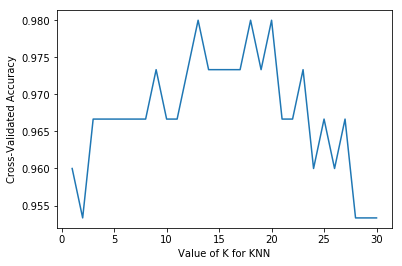

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

This is an example of the bias-variance trade-off in which low values of K procude a model with low bias and high variance and high values of K produce a model with high bias and low variance. The best model is found in the middle because it appropriately balances bias and variance **and thus it is most likely to generalize to out-of-sample data**. When deciding what exact value of K is the best, it is generally recommended to choose the value of K with the simplest model. In the case of KNN, higher values of K produce lower complexity models and thus we will chose K=20 as our single best KNN model.

So far we have used Cross-Validation to help us in parameter tuning, now lets take a look at an example of how cross-validation can be used to choose between different types of models: **KNN(k=20) vs LogisticRegression**

## Cross-validation example: model selection

**Goal**: Compare the best KNN model with logistic regression on the iris dataset

In [57]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.98


In [58]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.953333333333


So, we can conclude that KNN with k=20 is a better choice than logistic regression for this particular task.

Finally, lets see how Cross-Validation can help with feature selection.

## Cross-validation example: feature selection

**Goal:**: Select whether the Newspaper feature shoul be included in the linear regression model on the advertising dataset.

In [59]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [60]:
# read in the advertising dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [61]:
# create a python list of three feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the DataFrame (X)
X = data[feature_cols]

# select the sales column as the response (y)
y = data.sales

In [62]:
# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


/Users/Shravan/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Shravan/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Shravan/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Shravan/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [63]:
# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [64]:
# fix the sign of MSE
mse_scores = -scores
print(mse_scores)

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [65]:
# convert MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores.mean())

1.69135317081


In [66]:
# 10-fold cross validation with two features (excluding newspapers)
feature_cols = ['TV', 'radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.67967484191


Since RMSE is less than the model with newspaper and since our goal is to minimize the RMSE, we would conclude that removing the Newspaper from the model yields more accurate predictions.

## Review of parameter tuning using `cross_val_score`

**Goal**: Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset.

A few sections above we saw how we can use the `cross_val_score` function to find the best tuning parameters for KNN. There we had to write our own code and draw a plot of **Cross-validated accuracy** vs **Value of K for KNN** and then visually access which K value is the best. This is something we do often and it appears that there could be an easier way to do this. And yes, there is **GridSearchCV** which was created for that purpose.

## More efficient parameter tuning using `GridSearchCV`

**GridSearchCV** allows you to define a set of parameters that you want to try with a given model and it will automatically run cross-validation using each of those parameters keeping track of the resulting scores. Essentially it replaces the `for loop` above as well as providing some additional functionality. 

To get started with GridSearchCV we first import the class from `sklearn.grid_search`

In [67]:
from sklearn.grid_search import GridSearchCV

Exactly like above, we create a python list called `k_range` that specifies the k-values that we would like to search. 

In [70]:
k_range = range(1, 31)
print(list(k_range))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


Next, we create what is known as a `parameter grid`. It is simply a python dictionary, in which the key is the parameter name, and the value is a list of values that should be searched for that parameter.

In [72]:
# create a parameter grid: map the parameter names to the values that should be searched.
param_grid = dict(n_neighbors=list(k_range))
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


As you can see, this dictionary has a single key-value pair, in which the key is the string `n_neighbors` and the value is a list of numbers from 1 thru 30. Next we will instantiate the grid. You will notice that it has the same parameters as `cross_val_score` except it does not have the X and y but it does include the `param_grid`

In [73]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

You can think of the `grid` object as follows: 
* it is an object ready to do a 10-fold cross-validation on a KNN model using classification accuracy as the evaluation metric. But in addition it is given this parameter grid, so that it knows that it has to repeat the 10-fold cross-validation process 30 times and each time the n_neigbhor's parameter should be given a different value from the list. Hopefully this helps you to understand why the parameter_grid is specified using key-value pairs. We can't just give the GridSearchCV a list of numbers 1 thru 30, because it won't know what to do with those numbers. Instead we need to specifiy which model parameter, in this case, n_neighbors, should take on values 1 thru 30. One final note about instantiating the grid. If you computer supports parallel processing you can set the n_jobs parameter to -1 to instruct scikit-learn to use all available processors. Finally we **fit** the grid with data, with just the X and y objects. 

In [75]:
# store feature matrix in X
X = iris.data

# store response vector in y
y = iris.target

# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

This step may take a while depending on the model and the data and the number of parameters being searched. Remember that this is running 10-fold cross-validation 30 times and thus the KNN model is being fit and predictions being made 300 times.

Now that grid search is done, let's take a look at the results which are stored in the `grid_scores_` attribute.

In [76]:
# view the complete results (list of named tuples)
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

This is actually a list of 30 named tuples. The 1st tuple indicates that when the n_neighbors parameter was set to 1, the mean cross-validated accuracy was 0.96 and the standard deviation of the accuracy scores was 0.053. While the mean is usually what we pay attention, the standard deviation is something to keep in mind, because if the standard deviation is, then that means the cross-validated accuracy might not be as reliable.

Anyway, you can see that there is 1 tuple for each of the 30 trials of cross-validation.

Next, we will examine the individual tuples, just in case you need to do so in the future. I am going to slice the list to select the first tuple using the [0] notation.

In [77]:
# examine the first tuple
print(grid.grid_scores_[0])

mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1}


Because it is a named tuple, I can select its elements using the dot notation.

In [79]:
# examine the first tuple
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


* Parameters is simply a dictionary of the parameters that were used.
* cv_validation_scores is an array of the 10 accuracy scores that were generated during 10-fold cross-validation using that parameter.
* mean_validation_score is the mean of the 10 scores.

It is easy to collect the `mean_validation_scores` accross the 30 runs and plot them like we did above.

In [80]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.96, 0.9533333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.98, 0.9733333333333334, 0.98, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.96, 0.9666666666666667, 0.96, 0.9666666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


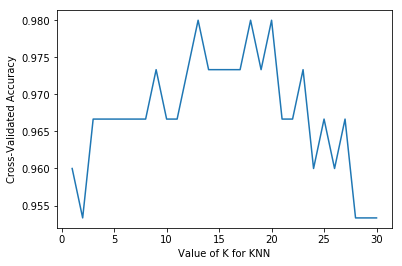

In [81]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

We see that the plot is identical to the one we generated above. 

Now you might be thinking that writing a list comprehension and then making a plot can't possibly be the most efficient way to view the results of GridSearch, you are exactly right. Once a grid is fit with data it exposes 3 attributes which are quite useful:
1. best_score_ : is the single best score achieved across all of the parameters
2. best_params_: is a dictionary of the parameters used to generate that score.
3. best_estimator_ : is the actual model object fit with those parameters which conviniently shows you all of the default parameters for that model that you did not specify.

In [82]:
# examine the model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


As you might have noticed in the plot, there are 2 more k values that produced a score of 0.98. I don't know for sure why GridSearch chose 13 as the best value but probably it picks the first occurance of the highest score.

## Searching multiple parameters simultaneously

For example, let's pretend that you are using a `DecisionTreeClassifier` which is a model we haven't yet covered in the series. Two important tuning parameters are `max_depth` and `min_samples_leaf` you can tune those parameters independently meaning that you used different values for `max_depth` while leaving `min_samples_leaf` at its default value and then you try different values for `min_samples_leaf` while leaving `max_depth` at its default value. The problem with that approach is that the best model performance can be achieved when neither of those 2 values are at their default values. Thus you need to **search** those two parameters simultaneously which is exactly what we are about to do with *GridSearchCV*

In the case of KNN, another parameter which might be worth tuning other than K is the weights parameter. This weights parameter controls how the K-nearest neighbors are weighted when making a prediction. The default option is **uniform** which means that all points in the neighborhood weighted equally but another option is **distance** which weights closer neighbors more heavily than further neighbors. Thus, I am going to create a list of those options called weight_options in addition to the 30 integer options represented by k_range